# Modelbase Calvin-Benson-Bassham models

This repository contains two models of the Calvin-Benson-Bassham cycle: the [Poolman 2000][1] model and a modified version containing a dynamic NADPH variable developed by Nima Saadat. Both models are written using the [modelbase][2] package.


## Install requirements

* NumPy
* matplotlib
* [modelbase][2]

---
[1]:https://doi.org/10.1093/jexbot/51.suppl_1.319
[2]:https://github.com/QTB-HHU/modelbase

Poolman, M. G., Fell, D. A., & Thomas, S. (2000). Modelling photosynthesis and its control. Journal of Experimental Botany, 51(suppl_1), 319–328. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# model imports
import modelbase
import model
import parameters
import reactions

INIT = {'PGA': 0.6437280277346407,
        'BPGA': 0.001360476366780556,
        'GAP': 0.011274125311289358,
        'DHAP': 0.24803073890728228,
        'FBP': 0.019853938009873073,
        'F6P': 1.0950701164493861,
        'G6P': 2.5186612678035734,
        'G1P': 0.14608235353185037,
        'SBP': 0.09193353265673603,
        'S7P': 0.23124426886012006,
        'E4P': 0.028511831060903877,
        'X5P': 0.036372985623662736,
        'R5P': 0.06092475016463224,
        'RUBP': 0.24993009253928708,
        'RU5P': 0.02436989993734177,
        'ATP': 0.43604115800259613}


INIT_NADPH = {'PGA' : 0.599645270373,
        'BPGA' : 0.000907499521924,
        'GAP' : 0.011839616887,
        'DHAP' : 0.260471552645,
        'FBP' : 0.021895569623,
        'F6P' : 1.2456290719,
        'G6P' : 2.86494686535,
        'G1P' : 0.166166918189,
        'SBP' : 0.1120019621,
        'S7P' : 0.233467059202,
        'E4P' : 0.0330766864679,
        'X5P' : 0.0374527459593,
        'R5P' : 0.0627333486958,
        'RUBP' : 0.261466058509,
        'RU5P' : 0.0250933393445,
        'ATP' : 0.414993685612,
        'NADPH' : 0.281543418344,}

Could not find GLIMDA


In [2]:
def plot_steady_state(t, y, groups):
    fig, ax = plt.subplots(2, 2, figsize=[12, 7], sharex=True)
    ax = ax.ravel()

    for (n, plot), group in zip(enumerate(ax), groups):
        for i in group:
            plot.plot(t, y[i], label=i)   
        plot.set_ylabel("Concentration [mM]")
        if n % 2 == 0:
            plot.legend(bbox_to_anchor=[-0.2, 1], loc='upper right',borderaxespad = 0)            
        else:        
            plot.legend(bbox_to_anchor=[1.2, 1], loc='upper left',borderaxespad = 0)
            plot.set_ylabel("Concentration [mM]")
            plot.yaxis.tick_right()
            plot.yaxis.set_label_position("right")
    ax[-2].set_xlabel("Time [au]")
    ax[-1].set_xlabel("Time [au]")
    fig.suptitle("Calvin cycle substrate concentrations", y=1.025, fontsize=16)
    fig.tight_layout()
    
def plot_external_phosphate_scan(ext_orthophosphate, y, groups, sharex=True):
    fig, ax = plt.subplots(2, 2, figsize=[12, 7])
    ax = ax.ravel()
    for (n, plot), group in zip(enumerate(ax), groups):
        for i in group:
            if i == "BPGA":
                plot.plot(ext_orthophosphate, y[i]*50, label=f"50x {i}")
            else:
                plot.plot(ext_orthophosphate, y[i], label=i)
                
        plot.set_ylabel("Concentration [mM]")
        if n % 2 != 0:            
            plot.yaxis.tick_right()
            plot.yaxis.set_label_position("right")
        plot.legend()
    ax[-2].set_xlabel("External orthophosphate [mM]")
    ax[-1].set_xlabel("External orthophosphate [mM]")
    fig.suptitle("External orthophosphate scan", y=1.025, fontsize=16)
    fig.tight_layout()
    plt.show()

## Poolman model

In [3]:
r = reactions.Reactions()
p = parameters.Parameters
m = model.Poolman(p,r)

y0 = np.array([INIT[i] for i in m.cpdNames])
s = modelbase.Simulator(m)
t = np.linspace(0,200,1000)
y = s.timeCourse(t, y0)
y = dict(zip(m.cpdNames, y.T))

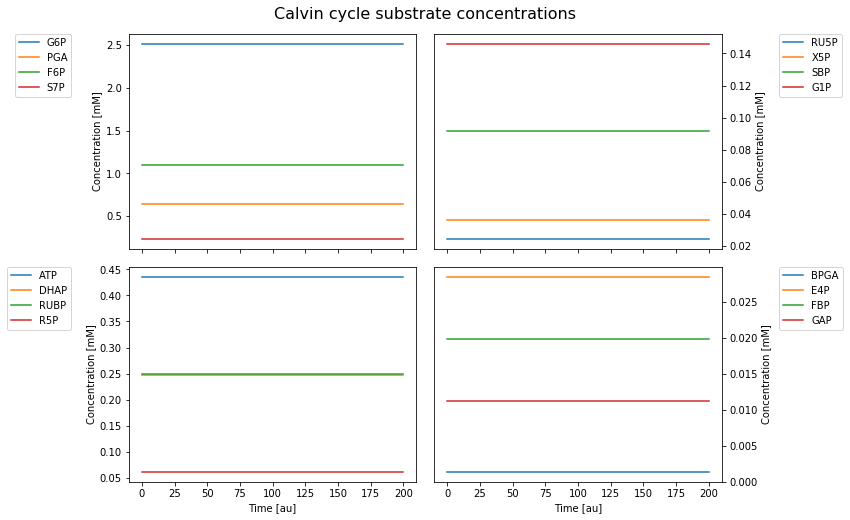

In [4]:
groups = [['G6P', 'PGA', 'F6P', 'S7P'],
          ['RU5P', 'X5P', 'SBP', 'G1P'],
          ['ATP', 'DHAP', 'RUBP', 'R5P'],
          ['BPGA', 'E4P', 'FBP', 'GAP']]
           
plot_steady_state(t, y, groups)

## Saadat Variant

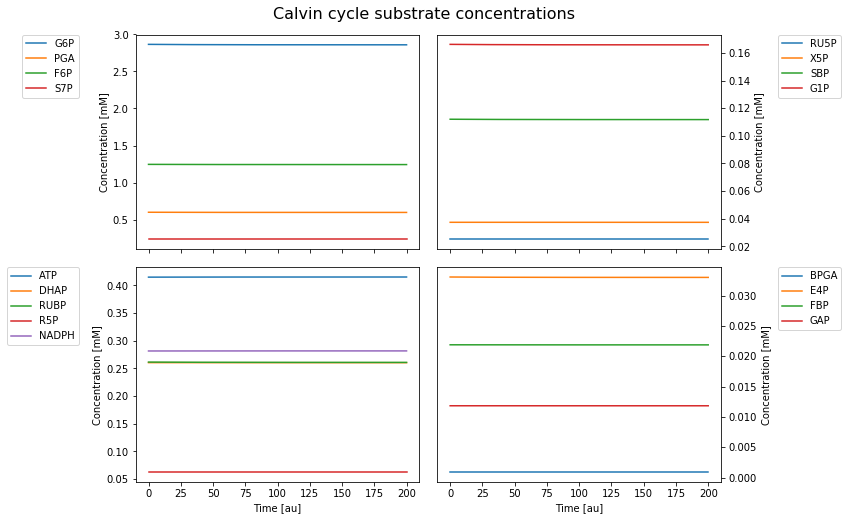

In [5]:
r = reactions.ReactionsNADPH()
p = parameters.ParametersNADPH
m = model.PoolmanNADPH(p,r)   
s = modelbase.Simulator(m)
t = np.linspace(0,200,1000)
y0 = np.array([INIT_NADPH[i] for i in m.cpdNames])
y = s.timeCourse(t, y0)
y = dict(zip(m.cpdNames, y.T))

groups = [['G6P', 'PGA', 'F6P', 'S7P'],
          ['RU5P', 'X5P', 'SBP', 'G1P'],
          ['ATP', 'DHAP', 'RUBP', 'R5P','NADPH'],
          ['BPGA', 'E4P', 'FBP', 'GAP']]

plot_steady_state(t, y, groups)

## External orthophosphate scans

Reproducing work by [Pettersson and Ryde-Pettersson][3]

[3]:https://doi.org/10.1111/j.1432-1033.1988.tb14242.x

---

PETTERSSON, G., & RYDE‐PETTERSSON, U. (1988). A mathematical model of the Calvin photosynthesis cycle. European Journal of Biochemistry, 175(3), 661–672.

In [6]:
%%capture

def orthophosphate_scan(m, i, init, scan_time):
    m.par.update({"Pext": i})
    s = modelbase.Simulator(m)
    s.set_initial_value(init)
    s.integrator.atol = 1e-8
    s.integrator.rtol = 1e-8
    s.integrator.maxncf = 1 
    s.integrator.maxnef = 3

    try:
        y = s.integrate(100000)
        if s.successful():
            return m.fullConcVec(y)
        else:
            return np.zeros(len(m.allCpdNames()))
    except:
        return np.zeros(len(m.allCpdNames()))

r = reactions.Reactions()
p = parameters.Parameters
m = model.Poolman(p,r)

y0 = np.array([INIT[i] for i in m.cpdNames])
ext_orthophosphate = np.linspace(0, 2, 128)
scan_time = np.linspace(0, 100000, 1000)

results = []
for i in ext_orthophosphate:
    results.append(orthophosphate_scan(m, i, y0, scan_time))

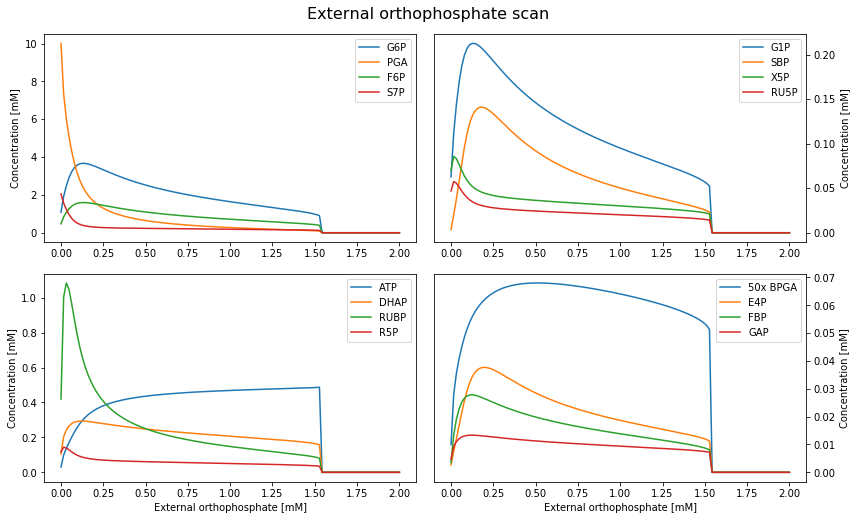

In [7]:
y = dict(zip(m.allCpdNames(), np.array(results).T))

groups = [['G6P', 'PGA', 'F6P', 'S7P'],
          ['G1P', 'SBP', 'X5P', 'RU5P'],
          ['ATP', 'DHAP', 'RUBP', 'R5P',],
          ['BPGA', 'E4P', 'FBP', 'GAP']]

plot_external_phosphate_scan(ext_orthophosphate, y, groups)